# Klasifikasi Dataset Iris Perbandingan Alogitma SVM, K-NN, dan Naive Bayes

## Import Library

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Dataset Yang Digunakan

In [80]:
data = pd.read_csv('IRIS.csv')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [82]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualisasi Analisis Data

<Axes: xlabel='petal_length', ylabel='petal_width'>

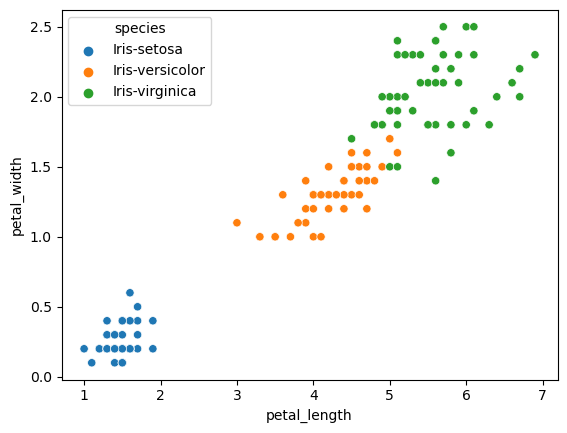

In [83]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=data)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

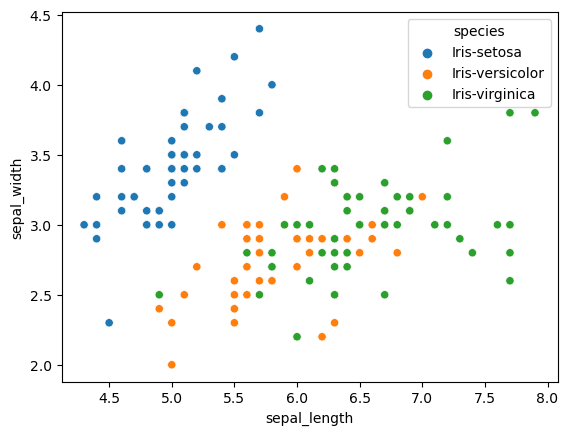

In [84]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data)

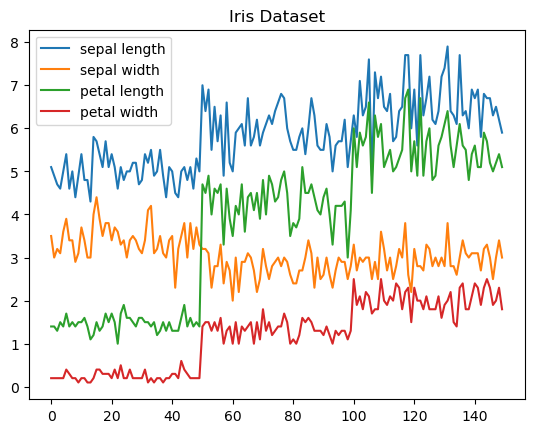

In [85]:
columns = data.columns.drop(['species'])

x_data = range(0, data.shape[0])

fig, ax = plt.subplots()

for column in columns:
    ax.plot(x_data, data[column])

ax.set_title('Iris Dataset')
ax.legend(['sepal length','sepal width','petal length','petal width'])

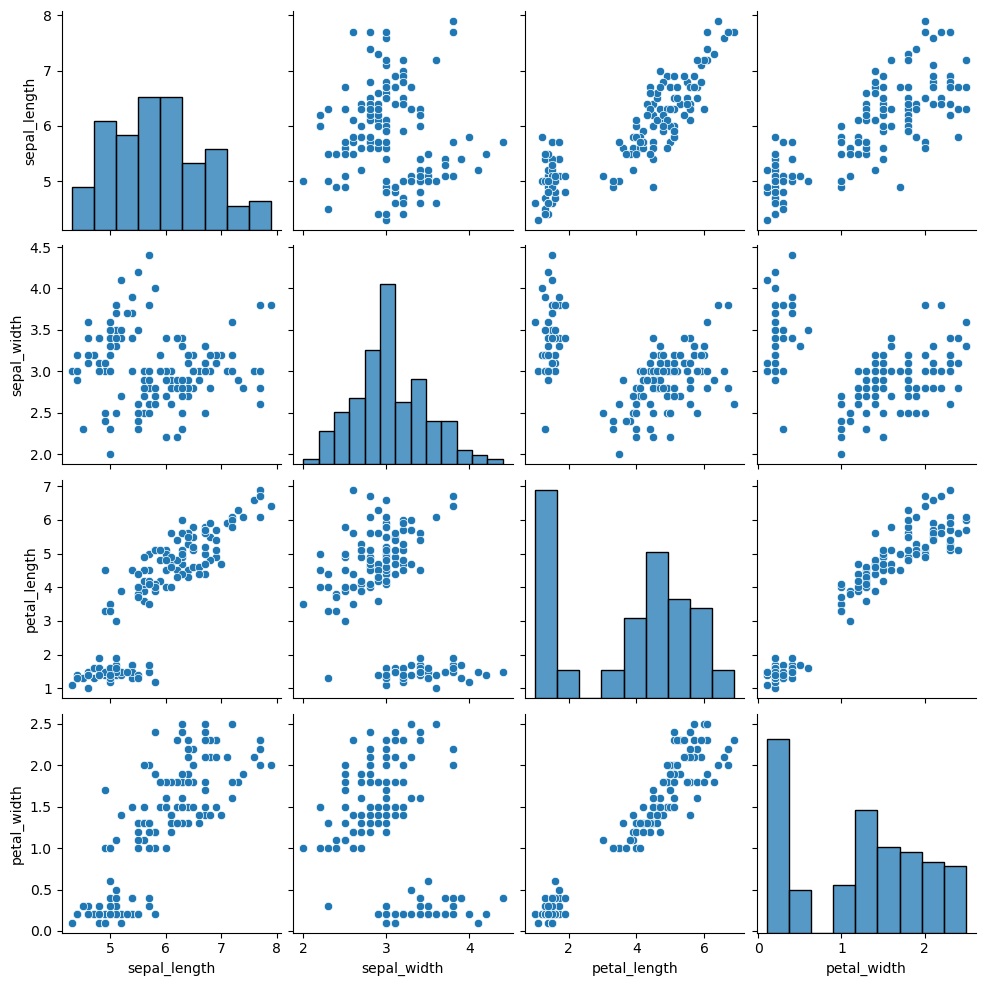

In [86]:
sns.pairplot(data)

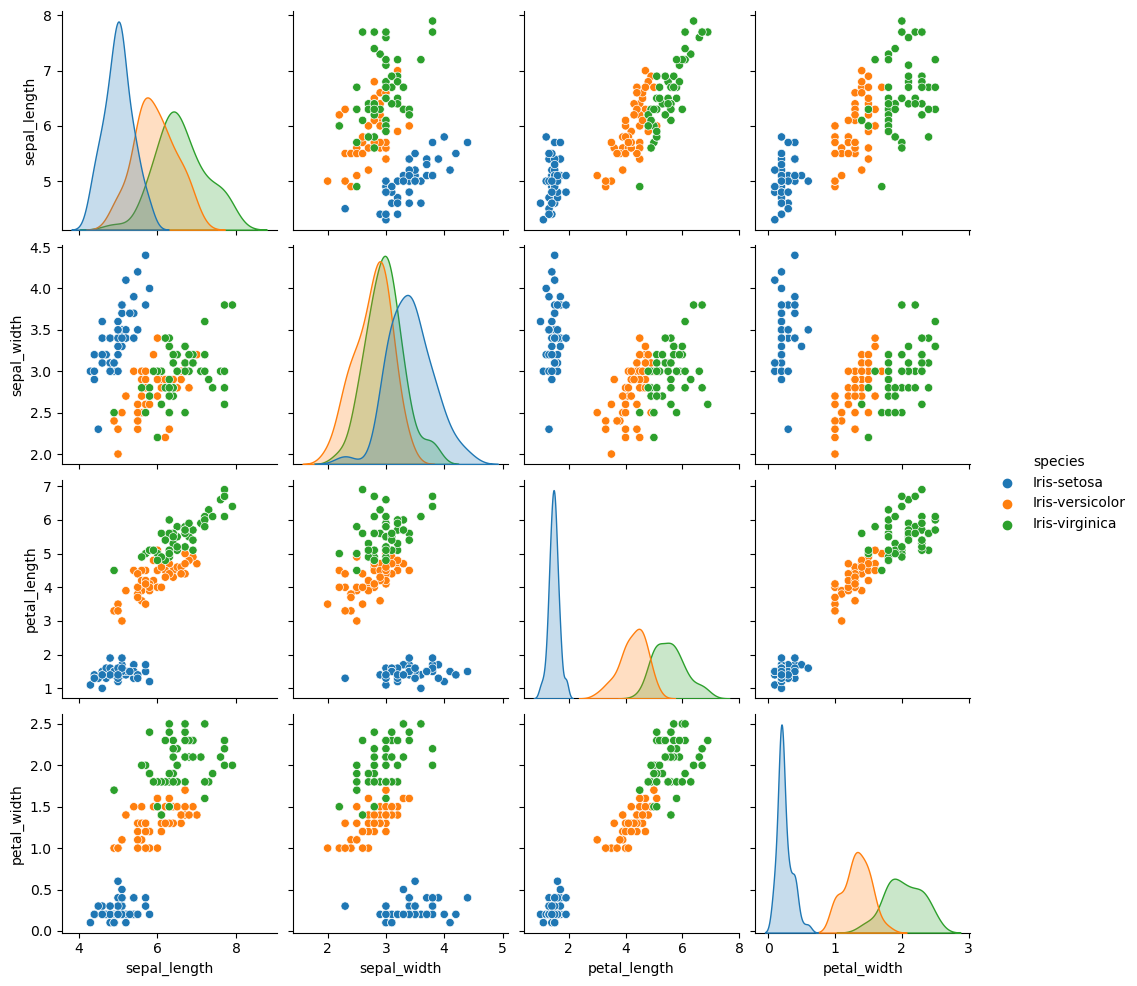

In [99]:
sns.pairplot(data, hue='species')
plt.show()

## Split Dataset

In [88]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [89]:
#Split data training 80% dan data testing 20%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Modeliing Data 

## Uji Data Menggunakan K-NN

In [90]:
#Membuat model K-NN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [91]:
#Evaluasi performa testing model K-NN

y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score (y_test, y_pred_knn)
print("Accuracy score K-NN:",accuracy_knn)
print("Classification Report K-NN:")
print(classification_report(y_test, y_pred_knn))

Accuracy score K-NN: 0.9666666666666667
Classification Report K-NN:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



HASIL ACCURACY SCORE DATA TESTING DARI ALGORITMA K-NN ADALAH 97%

In [92]:
#Evaluasi performa training model K-NN

y_pred_knn = knn.predict(x_train)
accuracy_knn = accuracy_score (y_train, y_pred_knn)
print("Accuracy score K-NN:",accuracy_knn)
print("Classification Report K-NN:")
print(classification_report(y_train, y_pred_knn))

Accuracy score K-NN: 0.95
Classification Report K-NN:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.94      0.89      0.92        37
 Iris-virginica       0.91      0.95      0.93        44

       accuracy                           0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120



HASIL ACCURACY SCORE DATA TRAINING DARI ALGORITMA K-NN ADALAH 95%

## Uji Data Dengan Naive Bayes

In [93]:
#Membuat model Naive Bayes

naiveB = GaussianNB()
naiveB.fit(x_train, y_train)

GaussianNB()

In [94]:
#Evaluasi performa testing model Naive Bayes

y_pred_naiveB = naiveB.predict(x_test)
accuracy_naiveB = accuracy_score (y_test, y_pred_naiveB)
print("Accuracy score Naive Bayes:",accuracy_naiveB)
print("Classification Report Naive Bayes:")
print(classification_report(y_test, y_pred_naiveB))

Accuracy score Naive Bayes: 0.9666666666666667
Classification Report Naive Bayes:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



HASIL ACCURACY SCORE DATA TESTING DARI ALGORITMA NAIVE BAYES ADALAH 97%

In [95]:
#Evaluasi performa training model Naive Bayes

y_pred_naiveB = naiveB.predict(x_train)
accuracy_naiveB = accuracy_score (y_train, y_pred_naiveB)
print("Accuracy score Naive Bayes:",accuracy_naiveB)
print("Classification Report Naive Bayes:")
print(classification_report(y_train, y_pred_naiveB))

Accuracy score Naive Bayes: 0.95
Classification Report Naive Bayes:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.92      0.92      0.92        37
 Iris-virginica       0.93      0.93      0.93        44

       accuracy                           0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120



HASIL ACCURACY SCORE DATA TRAINING DARI ALGORITMA NAIVE BAYES ADALAH 95%

## Uji Data Menggunakan Support Vector Machine (SVM)

In [96]:
#Membuat model SVM

svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [97]:
#Evaluasi performa testing model SVM

y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score (y_test, y_pred_svm)
print("Accuracy score Support Vector Machine(SVM):",accuracy_svm)
print("Classification Report Vector Machine(SVM):")
print(classification_report(y_test, y_pred_svm))

Accuracy score Support Vector Machine(SVM): 1.0
Classification Report Vector Machine(SVM):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



HASIL ACCURACY SCORE DATA TESTING DARI ALGORITMA SVM ADALAH 100%

In [98]:
#Evaluasi performa training model SVM

y_pred_svm = svm.predict(x_train)
accuracy_svm = accuracy_score (y_train, y_pred_svm)
print("Accuracy score Vector Machine(SVM):",accuracy_svm)
print("Classification Report Vector Machine(SVM):")
print(classification_report(y_train, y_pred_svm))

Accuracy score Vector Machine(SVM): 0.9583333333333334
Classification Report Vector Machine(SVM):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.97      0.89      0.93        37
 Iris-virginica       0.91      0.98      0.95        44

       accuracy                           0.96       120
      macro avg       0.96      0.96      0.96       120
   weighted avg       0.96      0.96      0.96       120



HASIL ACCURACY SCORE DATA TRAINING DARI ALGORITMA SVM ADALAH 96%

## Kesimpulan

Dari ketiga model diatas dapat disimpulkan bahwa model Klasifikasi SVM memliki performa yang lebih baik dari 2 model yang lainnya yaitu K-NN dan Naive Bayes,karena model Klasifikasi SVM mendapatkan score akurasi data testing sebesar 100% dan akurasi data training sebesar 96%